**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
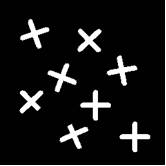
art8lab1.png: 
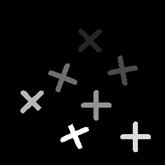
art8lab2.png: 
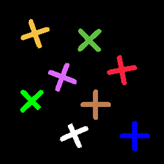
		

Using N_8.
Number of components: 8


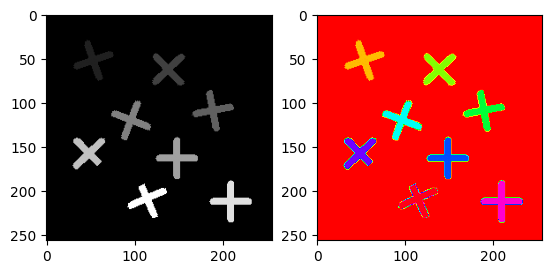

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from copy import deepcopy

def component_labeling(img, black_value=1):
    lines, columns = img.shape
    
    print("Using N_8.")
    
    modifiers = [(-1,-1),(-1,0),(-1,1),(0,-1)] # The index of the neighborhood pixels that should be verified.
    
    labels = np.zeros((lines, columns))
    equivalences = defaultdict(set)
    labels_without_equivalences = set()
    
    next_label = 1
    for i in range(lines):
        for j in range(columns):
            if img[i][j] == black_value: # Black (ignore).
                continue 
            
            for (modifier_i, modifier_j) in modifiers:
                try:
                    neighbor_label = labels[i + modifier_i][j + modifier_j]
                    if neighbor_label != 0: # Labelled neighbor
                        if labels[i][j] == 0:
                            labels[i][j] = neighbor_label # Receives the first label found.
                        elif labels[i][j] == neighbor_label:
                            continue
                        else:
                            smaller = min(labels[i][j], neighbor_label)
                            bigger = max(labels[i][j], neighbor_label)
                                
                            equivalences[smaller].add(bigger)           
                except IndexError:
                    continue
                
            if labels[i][j] == 0: # The pixel hasn't been labelled.
                labels[i][j] = next_label # The next available label is assigned to it.
                labels_without_equivalences.add(next_label)
                next_label += 1

    final_equivalences = resolve_transitive_equivalences(equivalences)
    for i in range(lines):
        for j in range(columns):
            label = labels[i][j]
            if label != 0:
                try:
                    labels[i][j] = final_equivalences[label]
                except KeyError:
                    continue
                
    return labels


def resolve_transitive_equivalences(equivalences):
    
    # Solve cases like 1 --> 2, 2 --> 3 (transitive)
    to_be_removed = []
    for key in list(equivalences.keys()):
        stack = list(equivalences[key])
            
        while len(stack) > 0:
            try:
                next = stack.pop(0)
                to_be_removed.append(next)
                next_values = list(equivalences[next])

                for item in next_values:
                    if item == key:
                        continue
                    
                    if item not in equivalences[key]:
                        stack.append(item)
                        equivalences[key].add(item)  
            except ValueError:
                continue
            
    for rem in to_be_removed:
        try:
            del equivalences[rem]
        except KeyError:
            continue
        
    # Solve cases like 1 --> 3, 2 --> 3 (common element)
    to_be_removed = []
    for key1 in list(equivalences.keys()):
        for key2 in list(equivalences.keys()):
            if key1 == key2:
                continue
            
            if equivalences[key1].isdisjoint(equivalences[key2]):
                continue
            
            # There is a common element
            
            smaller = min(key1, key2)
            bigger = max(key1, key2)
            
            equivalences[smaller].update(equivalences[bigger])
            equivalences[smaller].add(bigger)
            
            to_be_removed.append(bigger)
    
    for rem in to_be_removed:
        try:
            del equivalences[rem]
        except KeyError:
            continue        
                            
    final_equivalences = defaultdict()
    for key, values in equivalences.items():        
        for item in values:
            final_equivalences[item] = key
        
        final_equivalences[key] = key
            
    return final_equivalences

def re_sequence_labels(labelled_img):
    next_label = 1
    
    new_labels = defaultdict()
    
    lines, columns = labelled_img.shape
    for i in range(lines):
        for j in range(columns):
            actual_position = labelled_img[i][j] 
            if actual_position != 0:
                if actual_position not in new_labels:
                    new_labels[actual_position] = next_label
                    next_label += 1
                
                labelled_img[i][j] = new_labels[actual_position]
                
    return labelled_img, (next_label - 1)

if __name__ == "__main__":
    img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)

    labelled_img = component_labeling(img)
    re_labelled_img, num_components = re_sequence_labels(labelled_img)
    
    print(f"Number of components: {num_components}")
    
    plt.subplot(1,2,1)
    plt.imshow(re_labelled_img, cmap='gray', vmin=0, vmax=num_components)
    
    plt.subplot(1,2,2)
    plt.imshow(re_labelled_img, cmap='hsv', vmin=0, vmax=num_components)


2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

Using N_8.
The number of components is 178.


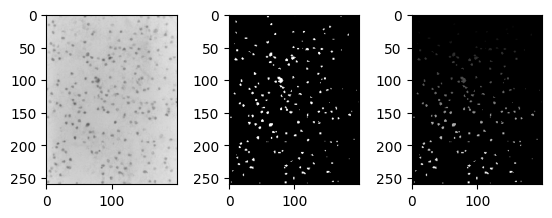

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
    img = cv2.imread("clc3.png", cv2.IMREAD_GRAYSCALE)

    img_bin = (img <= 156) * 255
    labelled_img = component_labeling(img_bin, black_value=0)
    
    re_labelled_img, num_components = re_sequence_labels(labelled_img)

    print(f"The number of components is {num_components}.")

    plt.subplot(1,3,1)
    plt.subplots_adjust(wspace=0.4)

    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

    plt.subplot(1,3,2)
    plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(1,3,3)
    plt.imshow(labelled_img, cmap='gray', vmin=0, vmax=num_components)

